In [ ]:
#Breast Cancer Detection

In [3]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from IPython.display import Image  # To Display a image of the graph

In [4]:
#load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv') #data frame
df.head(7)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [ ]:
#count the number of rows and columns in the data set
df.shape

(569, 32)

In [ ]:
#count the number of empty values (NaN, NAN, na) in each column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Drop the column with all missing values 
df = df.dropna(axis=1)

In [7]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [ ]:
#Get a count of the number of Malignant or Begnin cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


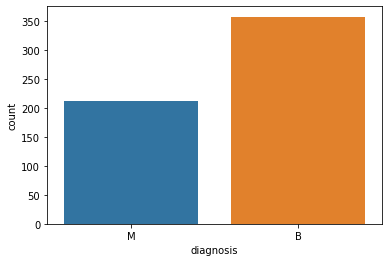

In [ ]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

In [ ]:
df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [8]:
#Encode the categorical data values,for diagnosis: M to 1, B to 0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [9]:
#Replace the encoding to the data frame
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [10]:
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

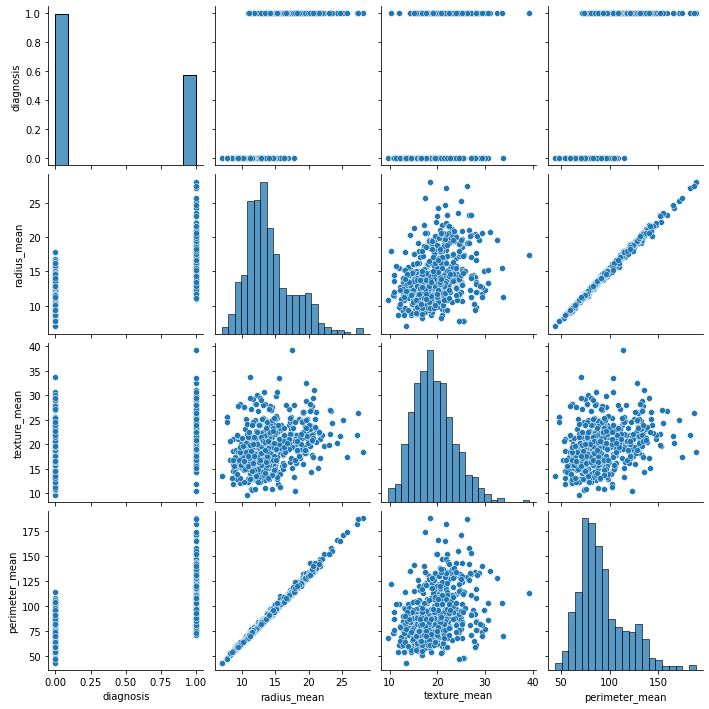

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:5])

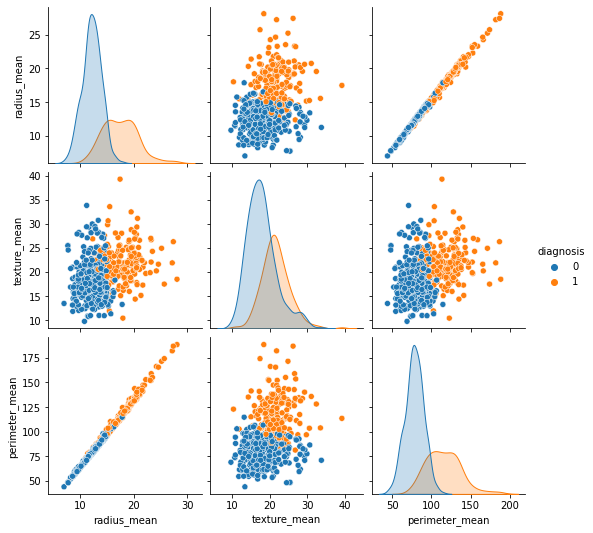

In [ ]:
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [11]:
#Split the data set into independent (X) and dependent (Y) data sets
#The dependent data set Y is going to tell us if the patient has cancer or not
#The independent data set X is going to tell us the features that can detect if the patient has cancer or not 
X = df.iloc[:,2:32].values
Y = df.iloc[:,1].values

type(X)

numpy.ndarray

In [12]:
#Split the data set into 75% training set and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
len(X_train)

426

In [ ]:
len(X_test)

143

In [ ]:
#---------------------------------------------------------------------------------------
#--------------------Just to try--------------------

In [16]:
list_attributes = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

In [ ]:
X_train_np = X_train
X_test_np = X_test

In [ ]:
x_train_df = pd.DataFrame(X_train_np, columns = list_attributes)
display(x_train_df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,0.2070,1.2380,1.234,13.88,0.007595,0.015000,0.014120,0.008578,0.01792,0.001784,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,1.959,19.62,0.012890,0.011040,0.003297,0.004967,0.04243,0.001963,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,0.2580,1.1660,1.683,22.22,0.003741,0.005274,0.010650,0.005044,0.01344,0.001126,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.014460,0.014230,0.005297,0.01961,0.001700,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.026230,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
422,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
423,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.023480,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
424,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.000000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [ ]:
x_test_df = pd.DataFrame(X_test_np, columns = list_attributes)
display(x_test_df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.0930,33.670,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
1,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.3140,17.580,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.6060,19.250,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0.2300,0.6690,1.6610,20.560,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
4,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.1700,14.160,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,1.0580,0.9635,7.2470,155.800,0.006428,0.028630,0.044970,0.017160,0.01590,0.003053,31.01,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
139,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,0.3336,1.8600,2.0410,19.910,0.011880,0.037470,0.045910,0.015440,0.02287,0.006792,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
140,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,0.1166,0.4957,0.7714,8.955,0.003681,0.009169,0.008732,0.005740,0.01129,0.001366,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592
141,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,0.4101,1.0140,2.6520,32.650,0.013400,0.028390,0.011620,0.008239,0.02572,0.006164,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191


In [ ]:
#--------------------End Trying--------------------

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Prediction and Accuracy on the training data

In [14]:
#The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Training the Decision Tree
clf_train = clf.fit(X_train, Y_train)

digraph Tree {
node [shape=box] ;
0 [label="X[7] <= -0.006\nentropy = 0.953\nsamples = 426\nvalue = [267, 159]"] ;
1 [label="X[20] <= 0.104\nentropy = 0.286\nsamples = 260\nvalue = [247, 13]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[13] <= 0.116\nentropy = 0.143\nsamples = 246\nvalue = [241, 5]"] ;
1 -> 2 ;
3 [label="X[21] <= 0.744\nentropy = 0.096\nsamples = 243\nvalue = [240, 3]"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 212\nvalue = [212, 0]"] ;
3 -> 4 ;
5 [label="X[23] <= -0.42\nentropy = 0.459\nsamples = 31\nvalue = [28, 3]"] ;
3 -> 5 ;
6 [label="entropy = 0.0\nsamples = 22\nvalue = [22, 0]"] ;
5 -> 6 ;
7 [label="X[0] <= -0.2\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]"] ;
5 -> 7 ;
8 [label="X[1] <= 2.321\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]"] ;
7 -> 8 ;
9 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [label="entropy = 0.0\nsamples = 5\nvalue

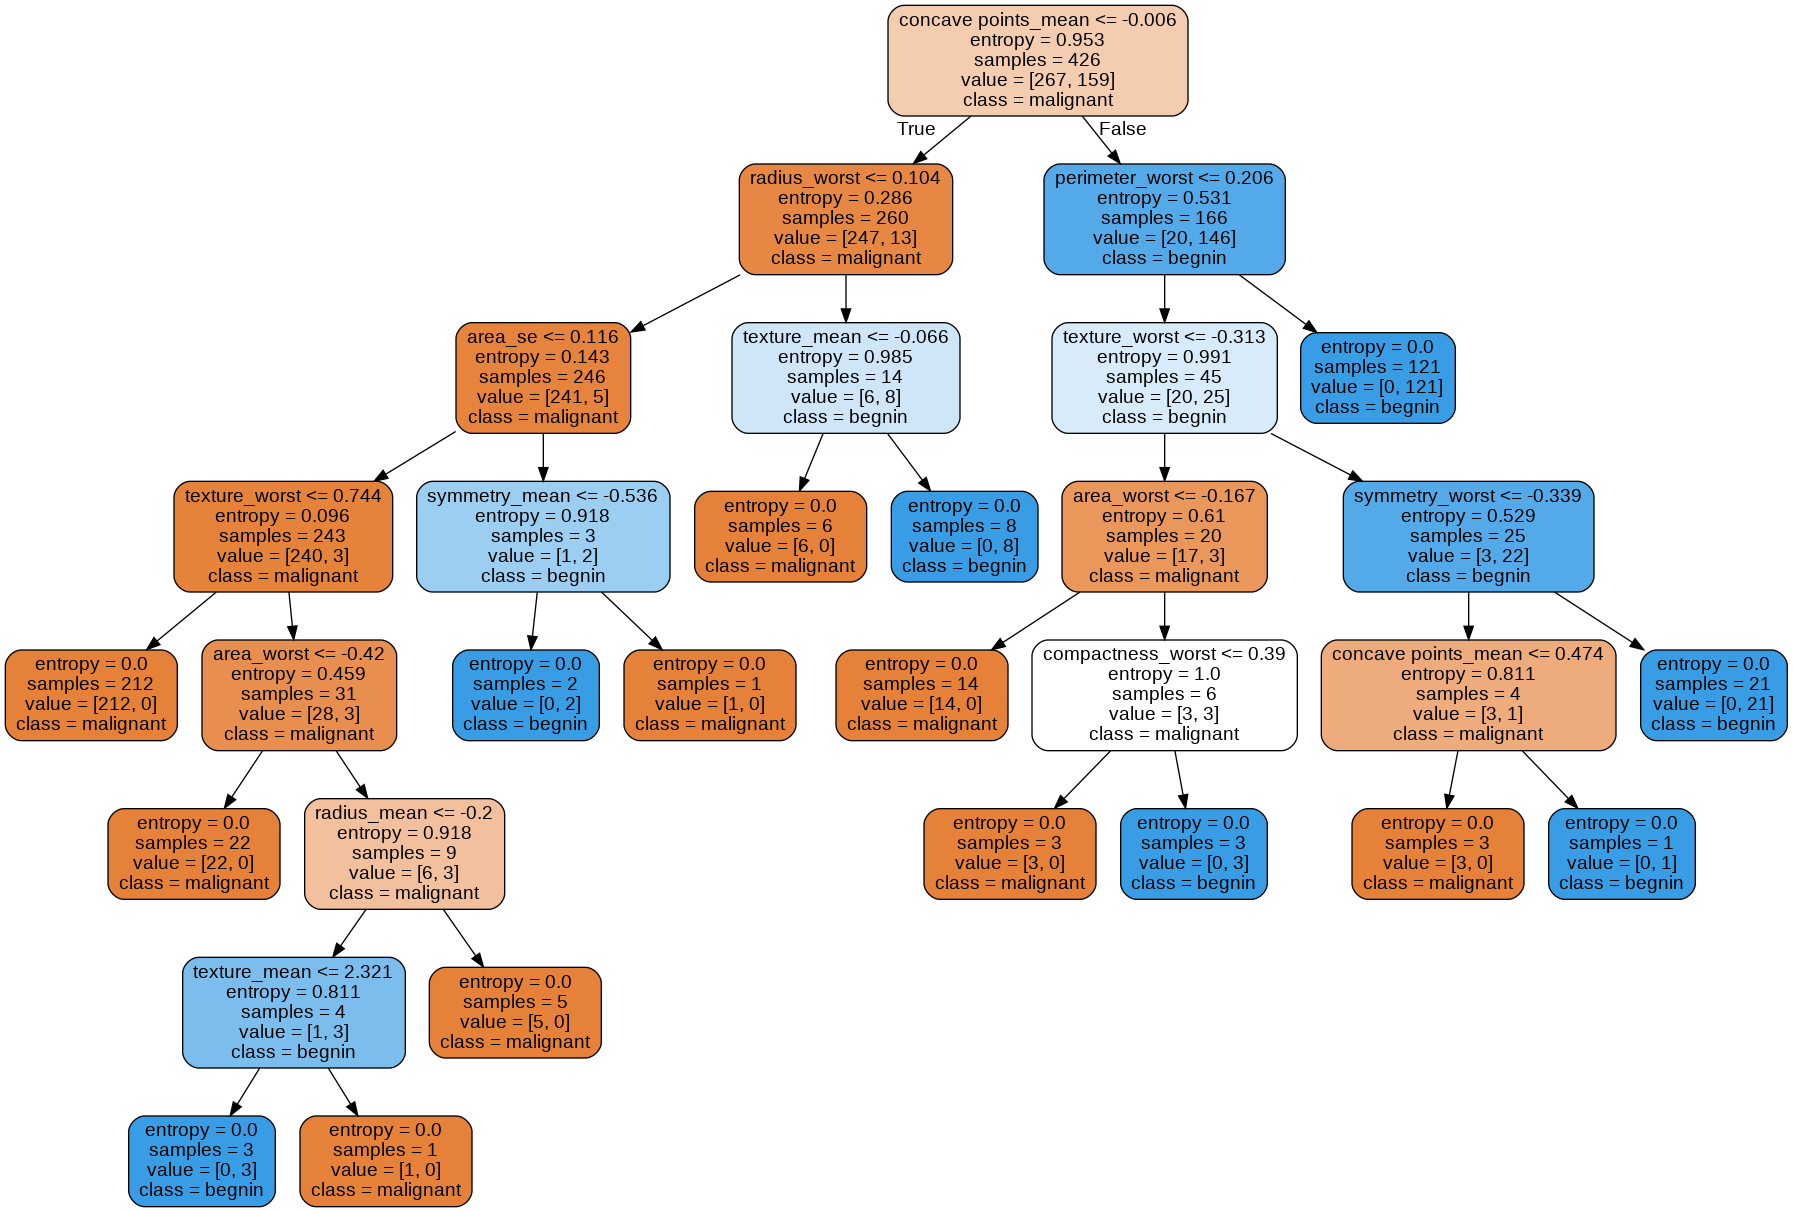

In [18]:
import pydotplus # To create our Decision Tree Graph
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(list_attributes), 
                                class_names=['malignant', 'begnin'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [26]:
#Prediction for decision tree
decision_predicted = clf.predict(X_test)

print(decision_predicted)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1]


In [27]:
print('Decision Tree Training Accuracy:', clf.score(X_train, Y_train))

Decision Tree Training Accuracy: 1.0


In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
guass_classifier = GaussianNB()

#Train the model using the training sets
guass_classifier.fit(X_train, Y_train)  

#Predict the response for test dataset
bayes_predicted= guass_classifier.predict(X_test)

print(bayes_predicted)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]


In [29]:
print('Gaussian Naive Bayes Training Accuracy:', guass_classifier.score(X_train, Y_train))

Gaussian Naive Bayes Training Accuracy: 0.9483568075117371


In [35]:
#Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

#Predict the response for test dataset
knn_predicted = knn.predict(X_test)

print(knn_predicted)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]


In [ ]:
#Accuracy on the test data

In [30]:
#Test model accuracy on test data on confusion matrix
#For Decision Tree Classification:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, clf.predict(X_test))

TP = cm[0][0] #True Positive
TN = cm[1][1] #True Negative
FN = cm[1][0] #False Negative
FP = cm[0][1] #False Positive

print(cm)
print('Decision Tree Testing Accuracy: ', (TP + TN)/(TP + TN + FN + FP))

[[86  4]
 [ 2 51]]
Decision Tree Testing Accuracy:  0.958041958041958


In [32]:
#Test model accuracy on test data on confusion matrix
#For Naive Bayes Classifier:
cm = confusion_matrix(Y_test, guass_classifier.predict(X_test))

TP = cm[0][0] #True Positive
TN = cm[1][1] #True Negative
FN = cm[1][0] #False Negative
FP = cm[0][1] #False Positive

print(cm)
print('Gaussian Naive Bayes Testing Accuracy: ', (TP + TN)/(TP + TN + FN + FP))

[[84  6]
 [ 6 47]]
Gaussian Naive Bayes Testing Accuracy:  0.916083916083916


In [36]:
#Test model accuracy on test data on confusion matrix
#For K-Nearest Neighbor KNN:
cm = confusion_matrix(Y_test, knn.predict(X_test))

TP = cm[0][0] #True Positive
TN = cm[1][1] #True Negative
FN = cm[1][0] #False Negative
FP = cm[0][1] #False Positive

print(cm)
print('K-Nearest Neighbor Testing Accuracy: ', (TP + TN)/(TP + TN + FN + FP))

[[89  1]
 [ 6 47]]
K-Nearest Neighbor Testing Accuracy:  0.951048951048951
